In [1]:
import os

In [2]:
%pwd

'F:\\Desktop\\Superteams\\Task3\\Building-a-Diet-and-Wellness-AI-Agent-A-Comprehensive-Guide\\Research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'F:\\Desktop\\Superteams\\Task3\\Building-a-Diet-and-Wellness-AI-Agent-A-Comprehensive-Guide'

In [5]:
import logging
from pathlib import Path
logging.basicConfig(
    # filename='extract_data.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)


In [6]:
import pandas as pd

# Read the TSV file into a pandas DataFrame
df = pd.read_csv("Dataset/train.tsv", sep='\t')

# Now you can work with the DataFrame as usual
df.head()


,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,"
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health"
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer"
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health"
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,


In [7]:
# Fill NaN values with empty strings
df['claim'] = df['claim'].fillna('')
df['explanation'] = df['explanation'].fillna('')

df['merged_data'] = df.apply(lambda row: row['claim'] + ' ' + row['explanation'], axis=1)
df

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects,merged_data
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,","""The money the Clinton Foundation took from fr..."
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health",Annual Mammograms May Have More False-Positive...
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer",SBRT Offers Prostate Cancer Patients High Canc...
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health","Study: Vaccine for Breast, Ovarian Cancer Has ..."
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,,Some appendicitis cases may not require ’emerg...
...,...,...,...,...,...,...,...,...,...,...
9827,35948,The Sturgis motorcycle rally in 2020 resulted ...,"September 10, 2020","They want to know if mass-events (protests, co...",Dan Evon,"In September 2020, social media was abuzz over...",,unproven,"Politics Medical, COVID-19",The Sturgis motorcycle rally in 2020 resulted ...
9828,401,AstraZeneca's infant respiratory drug prioriti...,"September 25, 1995",Britain’s AstraZeneca said a potential medicin...,,The “Breakthrough Therapy” and “Prime” designa...,,true,Health News,AstraZeneca's infant respiratory drug prioriti...
9829,2023,Testicular cancer deaths double with after 40 ...,"February 10, 2011",Men diagnosed with testicular cancer at 40 yea...,,This was true even when initial treatment and ...,http://bit.ly/fGNEw9,true,Health News,Testicular cancer deaths double with after 40 ...
9830,38118,The FDA published “conclusive proof” that the...,"November 22, 2017",FDA Confirms DTaP Vaccine Causes Autism in Nov...,Rich Buhler & Staff,The FDA hasn’t confirmed a link between DTaP v...,https://www.truthorfiction.com/marshall-kamena...,false,Medical,The FDA published “conclusive proof” that the...


In [8]:
# Create dfcopy with 100 rows
dfcopy = df.head(15).copy()

# Display the first few rows
dfcopy.head()

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects,merged_data
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,","""The money the Clinton Foundation took from fr..."
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health",Annual Mammograms May Have More False-Positive...
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer",SBRT Offers Prostate Cancer Patients High Canc...
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health","Study: Vaccine for Breast, Ovarian Cancer Has ..."
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,,Some appendicitis cases may not require ’emerg...


In [9]:
dfcopy['merged_data']

0     "The money the Clinton Foundation took from fr...
1     Annual Mammograms May Have More False-Positive...
2     SBRT Offers Prostate Cancer Patients High Canc...
3     Study: Vaccine for Breast, Ovarian Cancer Has ...
4     Some appendicitis cases may not require ’emerg...
5     Britain to reveal trial criteria for coronavir...
6     Angioplasty through the wrist backed by new st...
7     U.S. says results encouraging for healthcare d...
8     Latest trial in J&J talc litigations gets unde...
9     Poor test results for heart drugs "The story r...
10    Opossums kill thousands of ticks each week, in...
11    Democrats hoping to flip House not just trash-...
12    Hoodies riddled with faux bullet holes bearing...
13    Cancer Activist Sounds Alarm For Early Testing...
14    At the end of 2016, there were 23 percent fewe...
Name: merged_data, dtype: object

# Loading embeddding Model

In [11]:
from sentence_transformers import SentenceTransformer

F:\Desktop\Superteams\Task3\Building-a-Diet-and-Wellness-AI-Agent-A-Comprehensive-Guide\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
# from transformers import AutoTokenizer, AutoModel
# from pathlib import Path

# def download_model_and_tokenizer(model_name, save_path):
#     """
#     Download and save both the model and the tokenizer to the specified directory.

#     Parameters:
#         model_name (str): Name of the model to download.
#         save_path (str or Path): Path to the directory where the model and tokenizer will be saved.
#     """
#     # Create the save path if it doesn't exist
#     save_path = Path(save_path)
#     save_path.mkdir(parents=True, exist_ok=True)
    
#     # Initialize tokenizer and model
#     tokenizer = AutoTokenizer.from_pretrained(model_name)
#     model = AutoModel.from_pretrained(model_name)
    
#     # Save tokenizer
#     tokenizer.save_pretrained(save_path)
    
#     # Save model
#     model.save_pretrained(save_path)

# # Example usage
# model_name = 'sentence-transformers/all-MiniLM-L12-v2'  # Model name to download
# save_path = Path("MiniLM-L12-v2/")  # Path where model and tokenizer will be saved
# download_model_and_tokenizer(model_name, save_path)

In [15]:
from transformers import AutoTokenizer, AutoModel

def load_model_and_tokenizer(model_path):
    """
    Load the model and tokenizer from the specified directory.

    Parameters:
        model_path (str or Path): Path to the directory containing the saved model and tokenizer.

    Returns:
        tokenizer (transformers.PreTrainedTokenizer): Loaded tokenizer.
        model (transformers.PreTrainedModel): Loaded model.
    """
    model_path = Path(model_path)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModel.from_pretrained(model_path)
    return tokenizer, model

# Load the model and tokenizer
model_path = Path("MiniLM-L12-v2/")
tokenizer, model = load_model_and_tokenizer(model_path)

In [16]:
import torch

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def generate_embedding(text):
    # Tokenize input text
    encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    # Compute token embeddings with model
    with torch.no_grad():
        model_output = model(**encoded_input)
    # Perform mean pooling
    sentence_embedding = mean_pooling(model_output, encoded_input['attention_mask'])
    # Convert to numpy for FAISS compatibility and ensure it's 2D
    return sentence_embedding.cpu().numpy().reshape(1, -1)

In [18]:
# # Generate embeddings for the 'input' column
# dfcopy['encoded_merged_data'] = dfcopy['merged_data'].apply(lambda x: generate_embedding(x)[0].tolist())
# df.head()

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects,merged_data
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,","""The money the Clinton Foundation took from fr..."
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health",Annual Mammograms May Have More False-Positive...
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer",SBRT Offers Prostate Cancer Patients High Canc...
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health","Study: Vaccine for Breast, Ovarian Cancer Has ..."
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,,Some appendicitis cases may not require ’emerg...


In [20]:
dfcopy[['merged_data', 'encoded_merged_data']]

,merged_data,encoded_merged_data
0,"""The money the Clinton Foundation took from fr...","[-0.07623174041509628, -0.24572624266147614, 0..."
1,Annual Mammograms May Have More False-Positive...,"[0.16922590136528015, 0.0527237206697464, 0.12..."
2,SBRT Offers Prostate Cancer Patients High Canc...,"[0.10459750890731812, 0.026894034817814827, -0..."
3,"Study: Vaccine for Breast, Ovarian Cancer Has ...","[0.10558454692363739, 0.07883986085653305, -0...."
4,Some appendicitis cases may not require ’emerg...,"[-0.05416107922792435, 0.07790348678827286, -0..."
5,Britain to reveal trial criteria for coronavir...,"[-0.007874415256083012, 0.2401110678911209, -0..."
6,Angioplasty through the wrist backed by new st...,"[-0.001453812699764967, 0.029606623575091362, ..."
7,U.S. says results encouraging for healthcare d...,"[0.21500326693058014, 0.004916699603199959, -0..."
8,Latest trial in J&J talc litigations gets unde...,"[-0.10989657789468765, 0.07372067868709564, -0..."
9,"Poor test results for heart drugs ""The story r...","[-0.007354760076850653, 0.10843262076377869, -..."


In [21]:
# # Save the DataFrame to a CSV file
# save_path = "Dataset/encoded_health_data.csv"
# dfcopy.to_csv(save_path, index=False)

In [22]:
import pandas as pd

# Path to the CSV file
csv_file_path = "Dataset/encoded_health_data.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()

,claim_id,claim,date_published,explanation,fact_checkers,main_text,sources,label,subjects,merged_data,encoded_merged_data
0,15661,"""The money the Clinton Foundation took from fr...","April 26, 2015","""Gingrich said the Clinton Foundation """"took m...",Katie Sanders,"""Hillary Clinton is in the political crosshair...",https://www.wsj.com/articles/clinton-foundatio...,false,"Foreign Policy, PunditFact, Newt Gingrich,","""The money the Clinton Foundation took from fr...","[-0.07623174041509628, -0.24572624266147614, 0..."
1,9893,Annual Mammograms May Have More False-Positives,"October 18, 2011",This article reports on the results of a study...,,While the financial costs of screening mammogr...,,mixture,"Screening,WebMD,women's health",Annual Mammograms May Have More False-Positive...,"[0.16922590136528015, 0.0527237206697464, 0.12..."
2,11358,SBRT Offers Prostate Cancer Patients High Canc...,"September 28, 2016",This news release describes five-year outcomes...,"Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...",The news release quotes lead researcher Robert...,https://www.healthnewsreview.org/wp-content/up...,mixture,"Association/Society news release,Cancer",SBRT Offers Prostate Cancer Patients High Canc...,"[0.10459750890731812, 0.026894034817814827, -0..."
3,10166,"Study: Vaccine for Breast, Ovarian Cancer Has ...","November 8, 2011","While the story does many things well, the ove...",,"The story does discuss costs, but the framing ...",http://clinicaltrials.gov/ct2/results?term=can...,true,"Cancer,WebMD,women's health","Study: Vaccine for Breast, Ovarian Cancer Has ...","[0.10558454692363739, 0.07883986085653305, -0...."
4,11276,Some appendicitis cases may not require ’emerg...,"September 20, 2010",We really don’t understand why only a handful ...,,"""Although the story didn’t cite the cost of ap...",,true,,Some appendicitis cases may not require ’emerg...,"[-0.05416107922792435, 0.07790348678827286, -0..."


In [23]:
df[['merged_data', 'encoded_merged_data']]

,merged_data,encoded_merged_data
0,"""The money the Clinton Foundation took from fr...","[-0.07623174041509628, -0.24572624266147614, 0..."
1,Annual Mammograms May Have More False-Positive...,"[0.16922590136528015, 0.0527237206697464, 0.12..."
2,SBRT Offers Prostate Cancer Patients High Canc...,"[0.10459750890731812, 0.026894034817814827, -0..."
3,"Study: Vaccine for Breast, Ovarian Cancer Has ...","[0.10558454692363739, 0.07883986085653305, -0...."
4,Some appendicitis cases may not require ’emerg...,"[-0.05416107922792435, 0.07790348678827286, -0..."
5,Britain to reveal trial criteria for coronavir...,"[-0.007874415256083012, 0.2401110678911209, -0..."
6,Angioplasty through the wrist backed by new st...,"[-0.001453812699764967, 0.029606623575091362, ..."
7,U.S. says results encouraging for healthcare d...,"[0.21500326693058014, 0.004916699603199959, -0..."
8,Latest trial in J&J talc litigations gets unde...,"[-0.10989657789468765, 0.07372067868709564, -0..."
9,"Poor test results for heart drugs ""The story r...","[-0.007354760076850653, 0.10843262076377869, -..."


# Initialize Qdrant

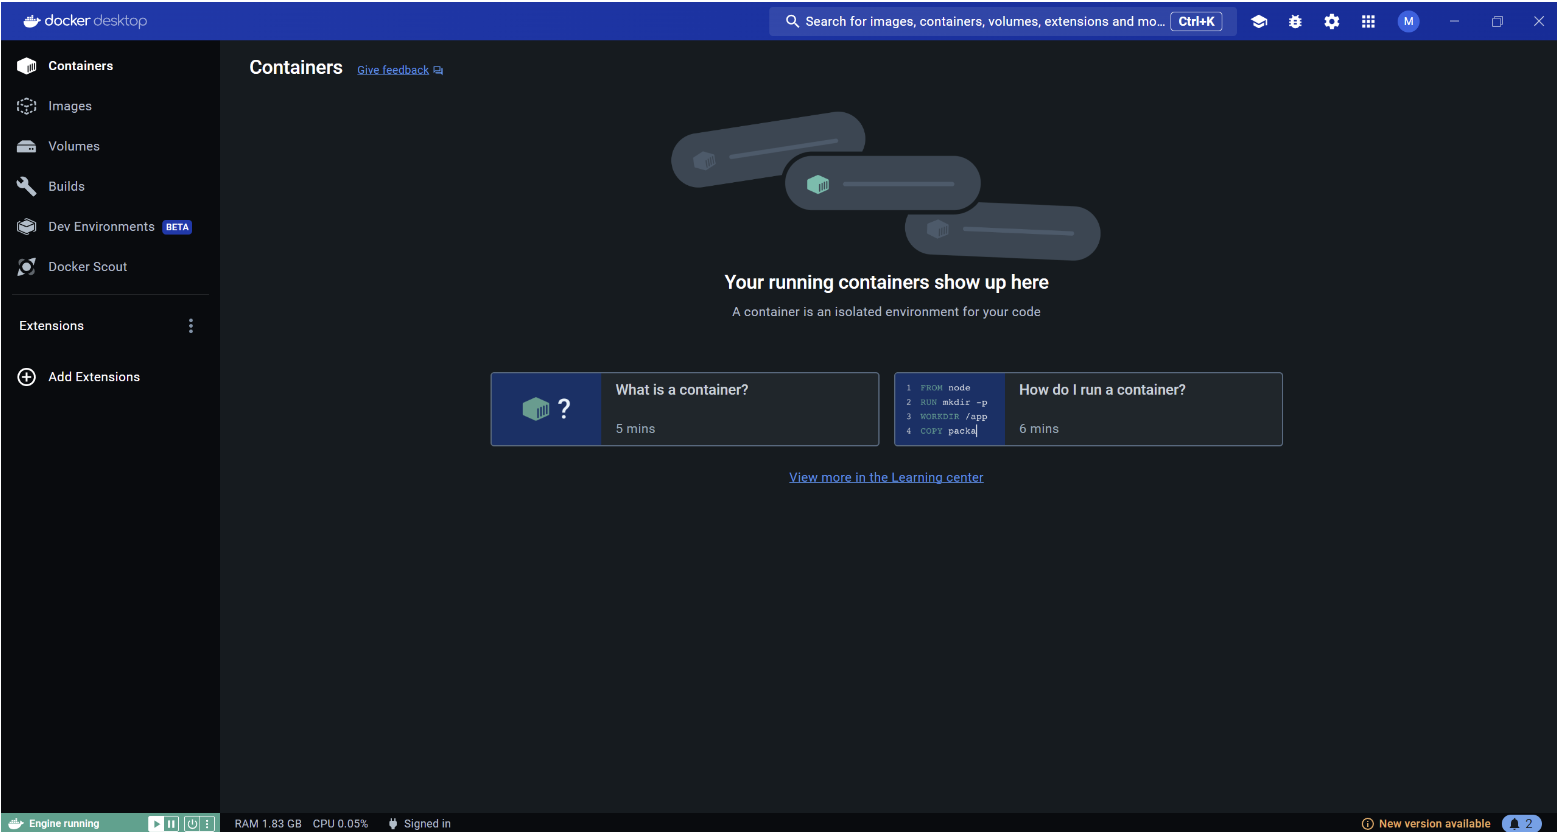

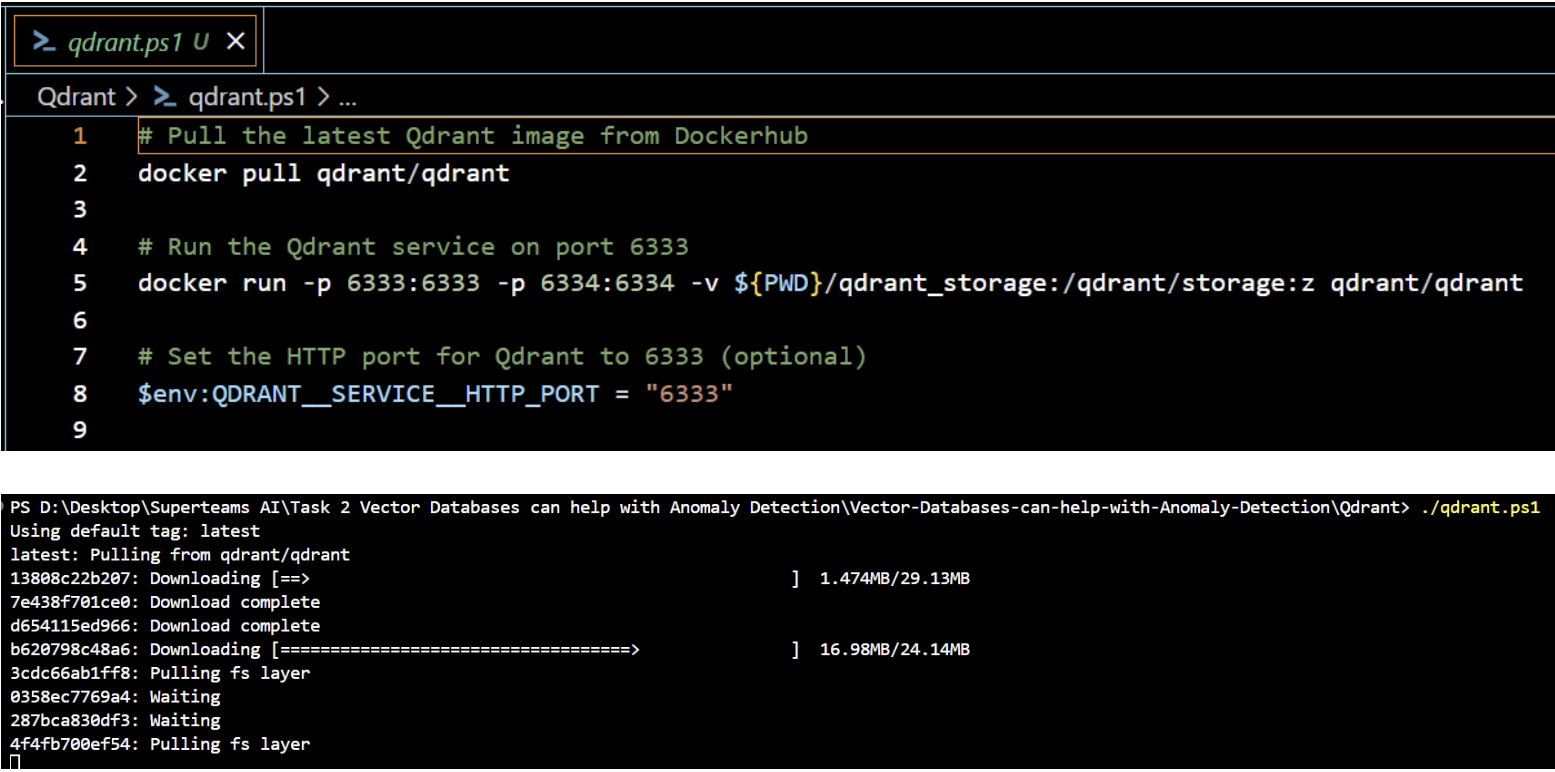

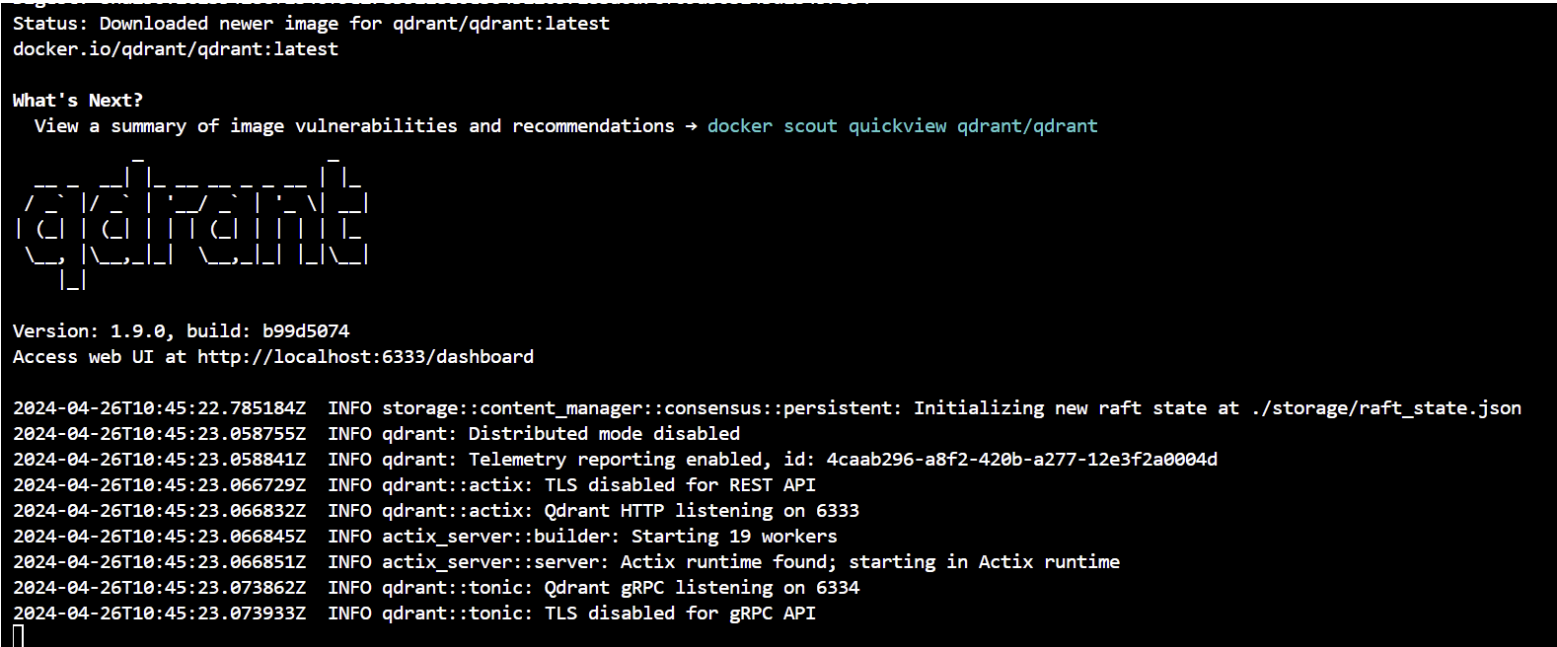

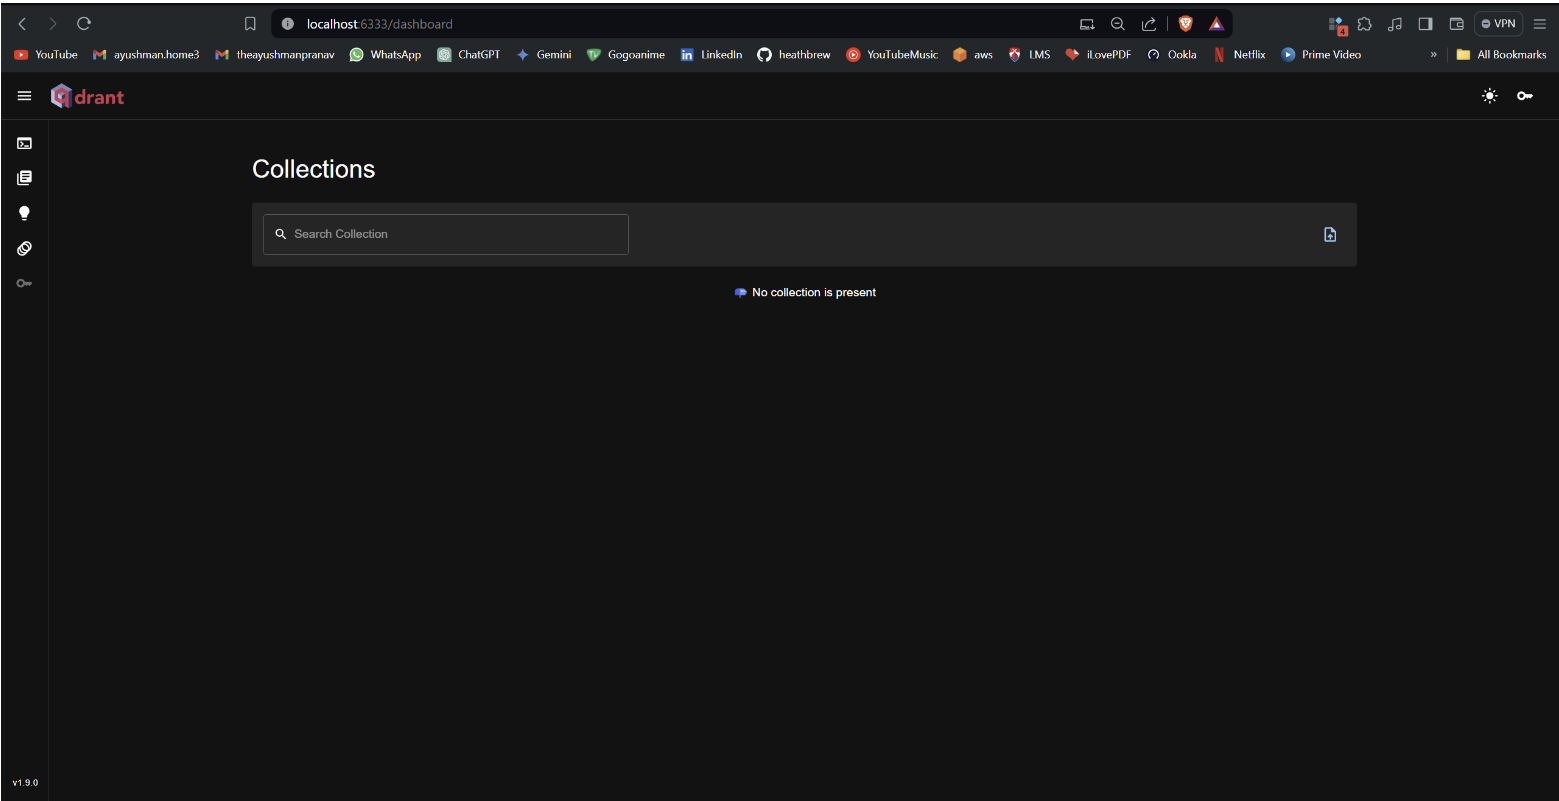

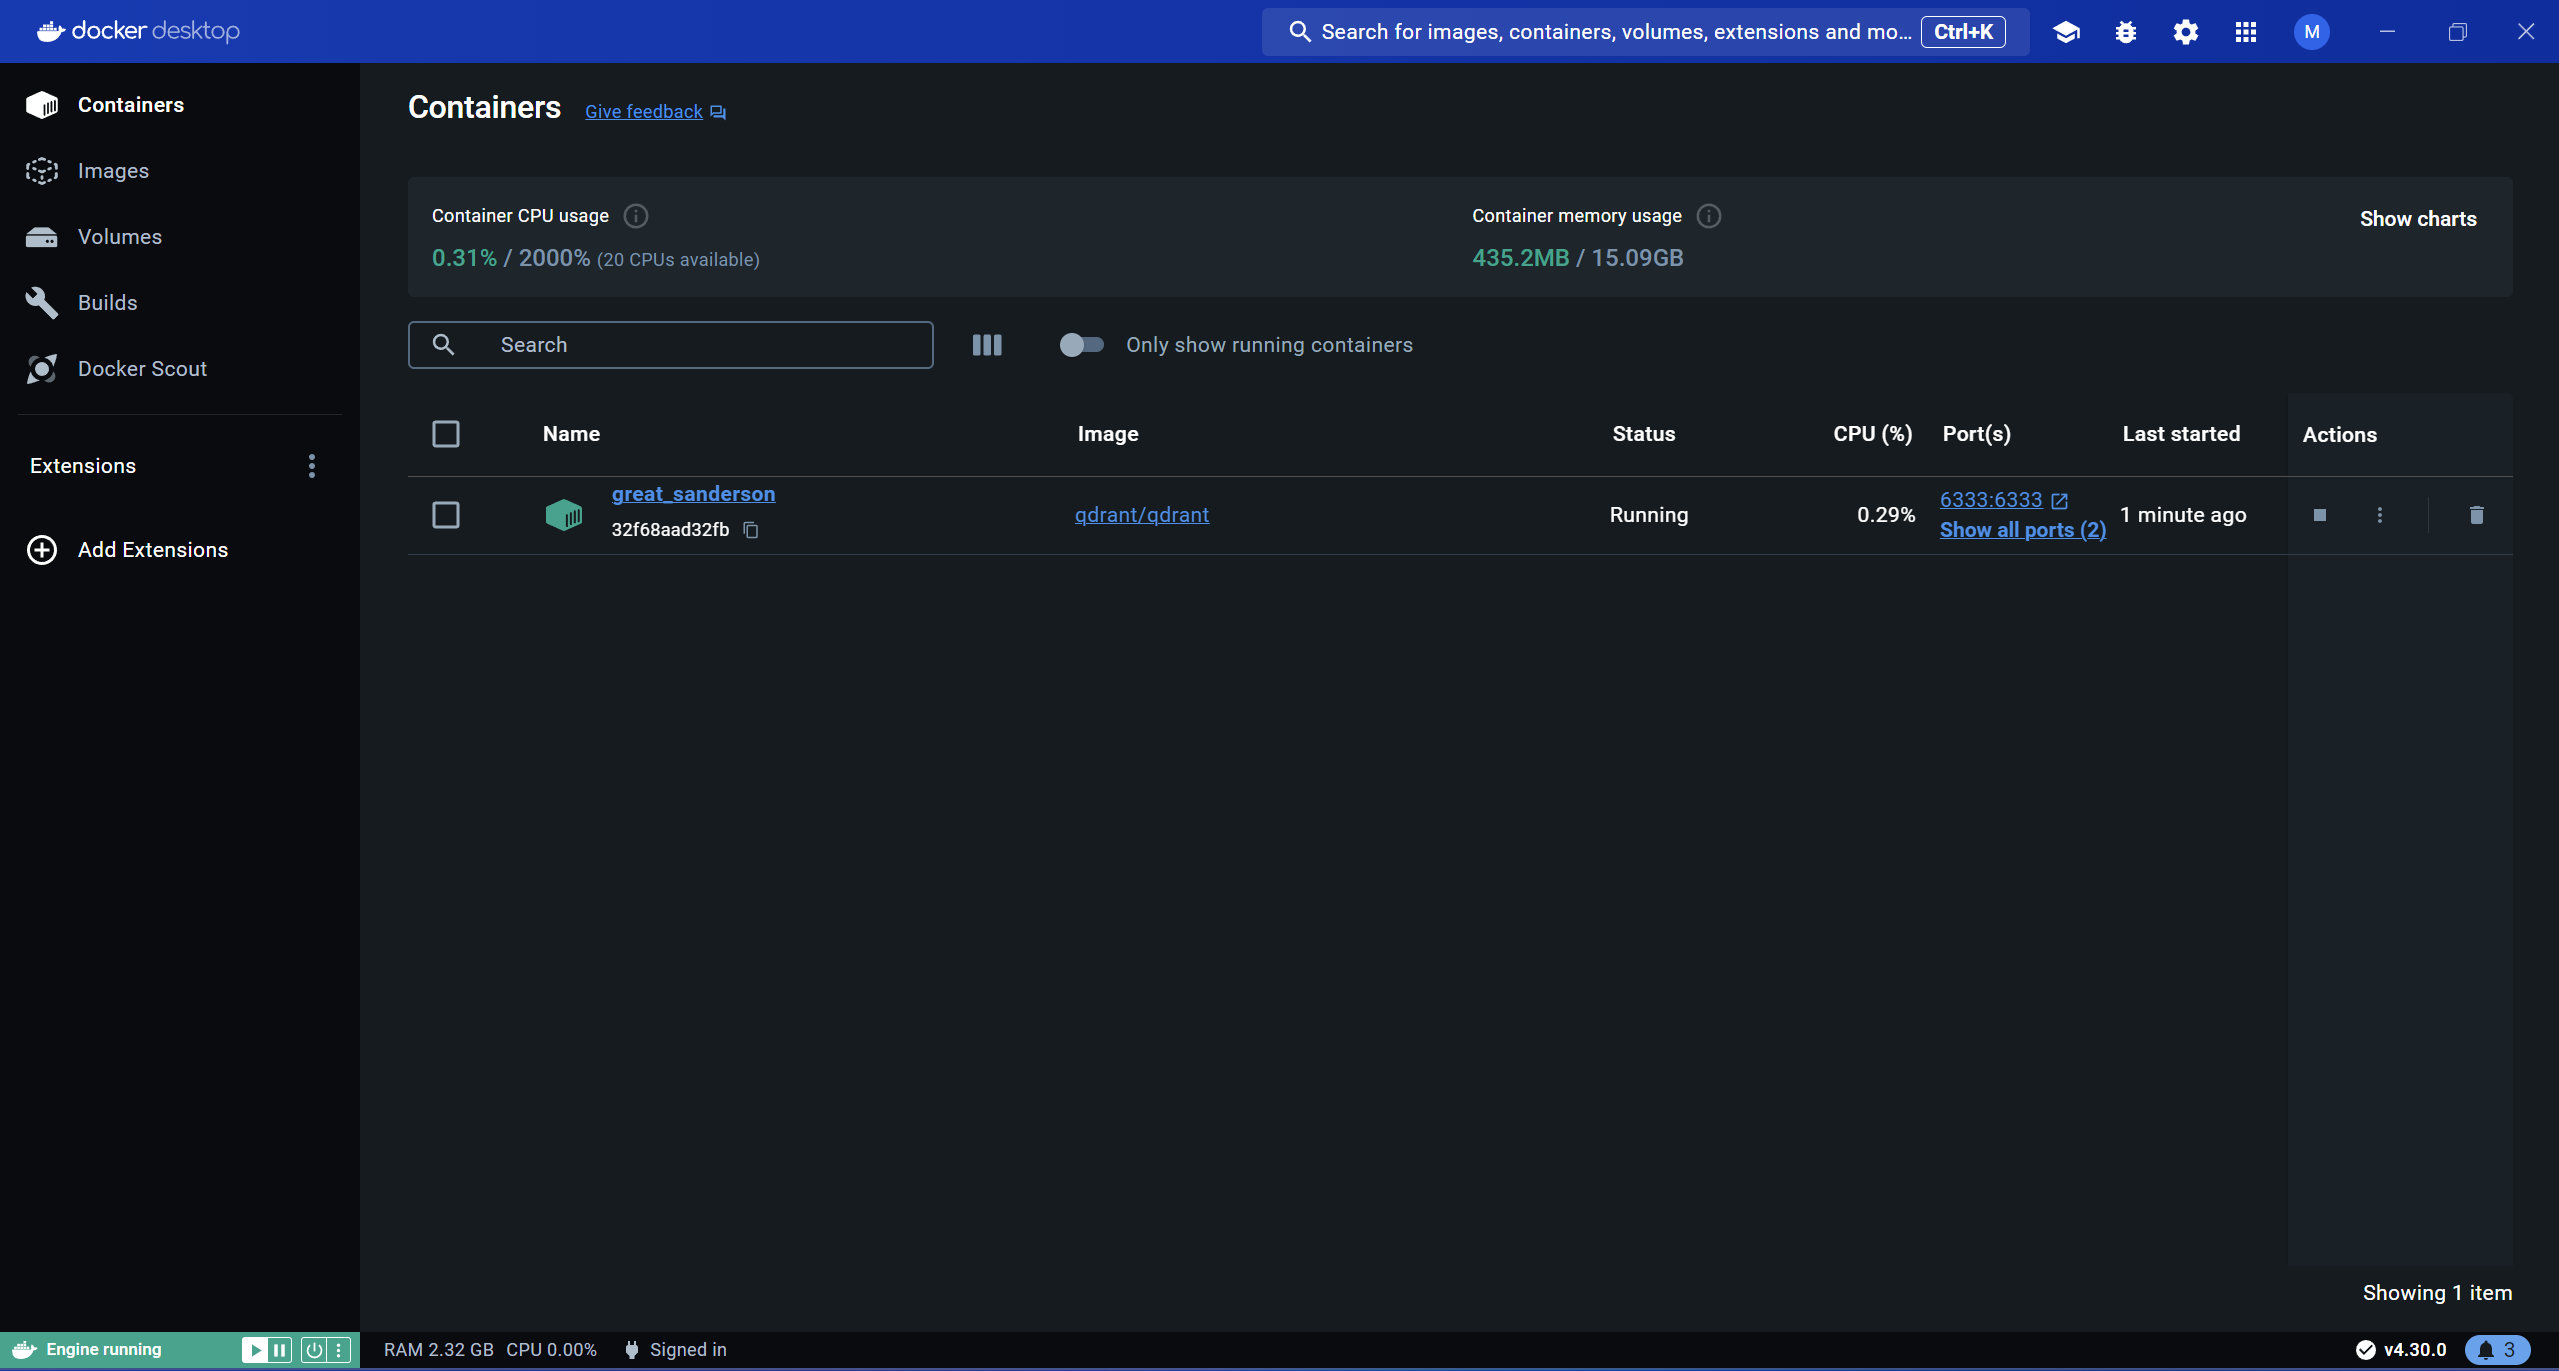

In [24]:
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams

# Initialize Qdrant client
qdrant_client = QdrantClient(host='localhost', port=6333)
collection_name = "pubhealth"

# Specify the vectors' configuration
vectors_config = VectorParams(
    size=model.config.hidden_size,  # The size of your embeddings
    distance=Distance.COSINE  # The distance metric for the vector space
)

# Create or recreate the collection with the specified configuration
qdrant_client.recreate_collection(
    collection_name=collection_name,
    vectors_config=vectors_config,
    # Optionally, you can specify other parameters for the collection
)

C:\Users\ayush\AppData\Local\Temp\ipykernel_6544\2192864635.py:15: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  qdrant_client.recreate_collection(
2024-05-22 15:56:30 - INFO - HTTP Request: DELETE http://localhost:6333/collections/pubhealth "HTTP/1.1 200 OK"
2024-05-22 15:56:34 - INFO - HTTP Request: PUT http://localhost:6333/collections/pubhealth "HTTP/1.1 200 OK"


True

In [33]:
import ast
from qdrant_client import QdrantClient
from qdrant_client.http.models import PointStruct

# Connect to Qdrant
client = QdrantClient(host="localhost", port=6333)

# Convert encoded_merged_data from string to list of floats if necessary
df['encoded_merged_data'] = df['encoded_merged_data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Insert data into Qdrant
for index, row in df.iterrows():
    qdrant_client.upsert(
        collection_name=collection_name,
        points=[{
            "id": index,  # Using the dataframe index as the ID
            "vector": row['encoded_merged_data'],  # Assuming row['encoded_merged_data'] is a list of floats
            "payload": {
                "claim": row['claim'],
                "explanation": row['explanation'],
                "label": row['label'],
                "main_text": row['main_text']
            }
        }]
    )


2024-05-22 16:04:16 - INFO - HTTP Request: PUT http://localhost:6333/collections/pubhealth/points?wait=true "HTTP/1.1 200 OK"
2024-05-22 16:04:16 - INFO - HTTP Request: PUT http://localhost:6333/collections/pubhealth/points?wait=true "HTTP/1.1 200 OK"
2024-05-22 16:04:16 - INFO - HTTP Request: PUT http://localhost:6333/collections/pubhealth/points?wait=true "HTTP/1.1 200 OK"
2024-05-22 16:04:16 - INFO - HTTP Request: PUT http://localhost:6333/collections/pubhealth/points?wait=true "HTTP/1.1 200 OK"
2024-05-22 16:04:16 - INFO - HTTP Request: PUT http://localhost:6333/collections/pubhealth/points?wait=true "HTTP/1.1 200 OK"
2024-05-22 16:04:16 - INFO - HTTP Request: PUT http://localhost:6333/collections/pubhealth/points?wait=true "HTTP/1.1 200 OK"
2024-05-22 16:04:16 - INFO - HTTP Request: PUT http://localhost:6333/collections/pubhealth/points?wait=true "HTTP/1.1 200 OK"
2024-05-22 16:04:16 - INFO - HTTP Request: PUT http://localhost:6333/collections/pubhealth/points?wait=true "HTTP/1.1 

In [45]:
logging.info(f"qdrant '{collection_name}' collection created")

2024-05-22 16:19:11 - INFO - qdrant 'pubhealth' collection created


In [72]:
from langchain.vectorstores import Qdrant

url = "http://localhost:6333"  # URL where the Qdrant service is running
collection_name =  "pubhealth"  # Name of the collection in Qdrant

# Initialize the Qdrant client with the specified URL
client = QdrantClient(
    url=url,
    prefer_grpc=False  # Indicates whether to use gRPC for communication
)

logging.info(f"QdrantClient initialized: {client}")  # Prints the client information
logging.info(f"#################################")  # Prints a separator line


2024-05-22 17:03:23 - INFO - QdrantClient initialized: <qdrant_client.qdrant_client.QdrantClient object at 0x000002789187BB90>
2024-05-22 17:03:23 - INFO - #################################


In [73]:
def similarity_search_with_score(query, k=2):
    query_embedding = generate_embedding(query)[0].tolist()
    search_results = qdrant_client.search(
        collection_name=collection_name,
        query_vector=query_embedding,
        limit=k,
        with_payload=True,
        with_vectors=False
    )
    return search_results

query = "What are the key strategies for improving public health in urban areas?"
search_results = similarity_search_with_score(query=query, k=5)

for result in search_results:
    doc_id = result.id
    score = result.score
    payload = result.payload  # The payload should contain your text or a reference to it.

    # Assuming the payload contains a field 'input' where the text is stored
    claim = payload.get('claim', 'No content available')
    explanation = payload.get('explanation', 'No content available')
    explanation = payload.get('explanation', 'No content available')
    label = payload.get('label', 'No content available')
    main_text = payload.get('main_text', 'No content available')

    # Print the similarity score and document content
    logging.info({"score": score, "doc_id": doc_id, "claim": claim, "explanation": explanation, "label": label, "main_text": main_text})

2024-05-22 17:03:24 - INFO - HTTP Request: POST http://localhost:6333/collections/pubhealth/points/search "HTTP/1.1 200 OK"
2024-05-22 17:03:24 - INFO - {'score': 0.3489651, 'doc_id': 7, 'claim': 'U.S. says results encouraging for healthcare delivery reforms.', 'explanation': 'The Obama administration on Thursday reported what it called encouraging results from efforts to reduce healthcare costs and improve the quality of care for more than 5 million Medicare beneficiaries under Obamacare', 'label': 'true', 'main_text': 'As part of President Barack Obama’s healthcare reform law, the efforts center around more than 360 accountable care organizations (ACOs), which are networks of doctors, hospitals and other providers specially organized to help move Medicare away from traditional fee-for-service medicine. The U.S. Centers for Medicare and Medicaid Services (CMS) said preliminary data show that the ACOs produced $380 million in savings vis-a-vis traditional Medicare in 2012 by giving doc

In [42]:
from openai_api import openaikey
os.environ["OPENAI_API_KEY"] = openaikey()

# 4. Building the Retrieval-Augmented Generation (RAG) React Agent

In [118]:
from langchain.agents import initialize_agent, Tool
from langchain.llms import OpenAI
from langchain.agents import AgentType
from langchain.tools import BaseTool

def similarity_search_with_score(query, k=1):
    query_embedding = generate_embedding(query)[0].tolist()
    search_results = qdrant_client.search(
        collection_name=collection_name,
        query_vector=query_embedding,
        limit=k,
        with_payload=True,
        with_vectors=False
    )
    return search_results

def lookup_tool(search_quality_reflection, search_quality_score):
    search_results = similarity_search_with_score(search_quality_reflection)
    lookup_str = "\n".join([f"Doc: {r.payload.get('claim', 'No text available')}" for r in search_results])
    return lookup_str

search_tool = Tool(
    name="Search",
    func=similarity_search_with_score,
    description="Searches for relevant information using a vector similarity search.",
    return_direct=True
)

lookup_tool = Tool(
    name="Lookup",
    func=lookup_tool,
    description="Looks up the actual text for the search results."
)

llm = OpenAI(temperature=0)
agent = initialize_agent([search_tool, lookup_tool], llm, agent=AgentType.REACT_DOCSTORE, verbose=True)

query = "What are the key strategies for improving public health in urban areas?"
result = agent.run(query)
print(result)

2024-05-22 18:45:08 - INFO - Retrying request to /completions in 0.837140 seconds




> Entering new AgentExecutor chain...


2024-05-22 18:45:10 - INFO - HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"
2024-05-22 18:45:10 - INFO - HTTP Request: POST http://localhost:6333/collections/pubhealth/points/search "HTTP/1.1 200 OK"


Thought: I need to search strategies for improving public health in urban areas and find the key strategies.
Action: Search[strategies for improving public health in urban areas]
Observation: [ScoredPoint(id=7, version=7, score=0.2911795, payload={'claim': 'U.S. says results encouraging for healthcare delivery reforms.', 'explanation': 'The Obama administration on Thursday reported what it called encouraging results from efforts to reduce healthcare costs and improve the quality of care for more than 5 million Medicare beneficiaries under Obamacare', 'label': 'true', 'main_text': 'As part of President Barack Obama’s healthcare reform law, the efforts center around more than 360 accountable care organizations (ACOs), which are networks of doctors, hospitals and other providers specially organized to help move Medicare away from traditional fee-for-service medicine. The U.S. Centers for Medicare and Medicaid Services (CMS) said preliminary data show that the ACOs produced $380 million in